<a href="https://colab.research.google.com/github/Arunsatvik/cmpe255-spring22/blob/main/Assignment1/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import sys
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
salaryData = pd.read_csv("/content/Levels_Fyi_Salary_Data.csv")
salaryData.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


# **Data filtering and cleaning**

In [ ]:
copy_salaryData = salaryData[[ 'totalyearlycompensation', 'company',  'title', 
       'location', 'yearsofexperience']]

clean_salaryData = copy_salaryData.dropna(subset=['company'])
clean_salaryData[clean_salaryData['company'].isna()]
titleList = pd.unique(clean_salaryData['title'])
locationList = pd.unique(clean_salaryData['location'])
companyList = pd.unique(clean_salaryData['company'])

np.set_printoptions(threshold=sys.maxsize)
print("Please select your position: \n", np.array(titleList))
print("Please select your location: \n", np.array(locationList))

Please select your position: 
 ['Product Manager' 'Software Engineer' 'Software Engineering Manager'
 'Data Scientist' 'Solution Architect' 'Technical Program Manager'
 'Human Resources' 'Product Designer' 'Marketing' 'Business Analyst'
 'Hardware Engineer' 'Sales' 'Recruiter' 'Mechanical Engineer'
 'Management Consultant']
Please select your location: 
 ['Redwood City, CA' 'San Francisco, CA' 'Seattle, WA' 'Sunnyvale, CA'
 'Mountain View, CA' 'Redmond, WA' 'Bellevue, WA' 'Menlo Park, CA'
 'London, EN, United Kingdom' 'Cupertino, CA' 'New York, NY'
 'Los Gatos, CA' 'Dublin, DN, Ireland' 'Baltimore, MD' 'Sacramento, CA'
 'Hillsboro, OR' 'Cambridge, EN, United Kingdom' 'Aliso Viejo, CA'
 'San Jose, CA' 'Bangalore, KA, India' 'Minsk, HM, Belarus'
 'Palo Alto, CA' 'Kirkland, WA' 'Washington, DC' 'Vancouver, BC, Canada'
 'Austin, TX' 'Boston, MA' 'San Diego, CA' 'New Orleans, LA'
 'Santa Clara, CA' 'Irvine, CA' 'Pittsburgh, PA' 'San Ramon, CA'
 'Los Angeles, CA' 'Folsom, CA' 'Charleston, SC

In [ ]:
while(True):
    in_position = input("Enter your position as excat from above: ")
    in_location = input("Enter your location as excat from above: ")
    if (in_position in titleList and in_location in locationList ):
        break
        
clean_salaryData = pd.get_dummies(clean_salaryData, columns=['title', 'location','company'])
print(f"You enter {in_position} as your position and {in_location} as your location")

Enter your position as excat from above: Product Manager
Enter your location as excat from above: Redwood City, CA
You enter Product Manager as your position and Redwood City, CA as your location


In [ ]:
position= "title_" + in_position
location = "location_" + in_location

In [ ]:
q1_salaryData = clean_salaryData[["totalyearlycompensation",'yearsofexperience', location, position]]
q1_salaryData

qOne = q1_salaryData.quantile(0.25)
qThree = q1_salaryData.quantile(0.75)
IQR = qThree-qOne
q1_salaryData = q1_salaryData[~((q1_salaryData < (qOne - 1.5 *IQR)) | (q1_salaryData > (qThree + 1.5 * IQR))).any(axis=1)]

q1_salaryData


,totalyearlycompensation,yearsofexperience,"location_Redwood City, CA",title_Product Manager
1,100000,5.0,0,0
3,372000,7.0,0,0
4,157000,5.0,0,0
5,208000,8.5,0,0
6,300000,15.0,0,0
...,...,...,...,...
62637,327000,10.0,0,0
62638,237000,2.0,0,0
62639,220000,14.0,0,0
62640,280000,8.0,0,0


In [ ]:
train = q1_salaryData.sample(frac=0.6, random_state=1)
temp = q1_salaryData.drop(train.index)
test = temp.sample(frac=0.5,random_state=1)
val = q1_salaryData.drop(test.index)

ytrain = train['totalyearlycompensation']
xtrain= train.drop(columns=['totalyearlycompensation'])
ytest = test['totalyearlycompensation']
xtest= test.drop(columns=['totalyearlycompensation'])
yval = val['totalyearlycompensation']
xval = val.drop(columns=['totalyearlycompensation'])

In [ ]:
linear_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=3)
])
linear_regression.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 5, momentum=0.4, nesterov=True), loss= 'mean_absolute_error')
# linear_regression.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 5), loss= 'mean_absolute_error')

hist = linear_regression.fit(xtrain,ytrain,epochs=500)

Epoch 1/500
1009/1009 [==============================] - 2s 2ms/step - loss: 116232.6797
Epoch 2/500
1009/1009 [==============================] - 1s 1ms/step - loss: 98904.4609
Epoch 3/500
1009/1009 [==============================] - 1s 1ms/step - loss: 97443.8516
Epoch 4/500
1009/1009 [==============================] - 1s 1ms/step - loss: 96034.3594
Epoch 5/500
1009/1009 [==============================] - 1s 1ms/step - loss: 94650.7266
Epoch 6/500
1009/1009 [==============================] - 1s 1ms/step - loss: 93312.9688
Epoch 7/500
1009/1009 [==============================] - 1s 1ms/step - loss: 92025.1172
Epoch 8/500
1009/1009 [==============================] - 1s 1ms/step - loss: 90757.5078
Epoch 9/500
1009/1009 [==============================] - 1s 1ms/step - loss: 89532.0547
Epoch 10/500
1009/1009 [==============================] - 1s 1ms/step - loss: 88342.6953
Epoch 11/500
1009/1009 [==============================] - 1s 1ms/step - loss: 87199.0312
Epoch 12/500
1009/1009 [=====

KeyError: ignored

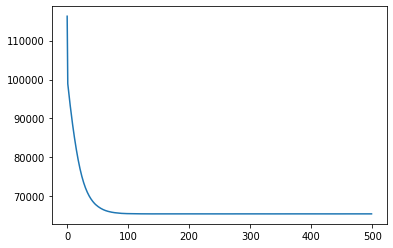

In [ ]:
#reference from https://www.tensorflow.org/tutorials/keras/regression
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylim([0, max(hist.history['loss'])])
plt.xlabel('Epoch')
plt.ylabel('Error [totalyearlycompensation]')
plt.legend()
plt.grid(True)

In [ ]:
linear_regression.evaluate(xtest,ytest)

337/337 [==============================] - 1s 2ms/step - loss: 66039.5469


66039.546875

In [ ]:
q1_predict = linear_regression.predict(xtest).flatten()
def rmse(y_predict, y_test):
    return np.sqrt(np.square(np.subtract(y_test,y_predict)).mean())
rmse(q1_predict,ytest)

84737.07747010032

In [ ]:
p_df = pd.DataFrame(columns=['p','y'])
type(q1_predict)
p_df['p'] = q1_predict
p_df['y'] = ytest.to_numpy()

p_df

,p,y
0,177139.625000,268000
1,196907.843750,112000
2,236444.312500,300000
3,144192.578125,150000
4,223265.484375,245000
...,...,...
10752,144192.578125,71000
10753,196907.843750,180000
10754,183729.031250,450000
10755,177139.625000,280000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


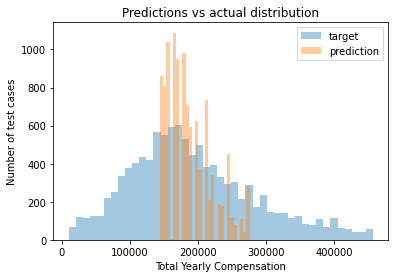

In [ ]:
sns.distplot(ytest, label='target', kde=False)
sns.distplot(q1_predict, label='prediction', kde=False)

plt.legend()

plt.ylabel('Number of test cases')
plt.xlabel('Total Yearly Compensation')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
in_yearEx = input("Please enter how many years of experience you have:")
in_yearEx = float(in_yearEx)
in_prediction =[[in_yearEx,1,1]]
ans_q1 = linear_regression.predict(in_prediction)

print( "If you join for a " + in_position +  " based on "+ str(in_yearEx) + " and in " + in_location + ", you will get: " + str(ans_q1[0][0]))

Please enter how many years of experience you have:10
If you join for a Product Manager based on 10.0 and in Redwood City, CA, you will get: 210084.78


In [ ]:
print("Please select your company: \n", np.array(companyList))

Please select your company: 
 ['Oracle' 'eBay' 'Amazon' 'Apple' 'Microsoft' 'Salesforce' 'Facebook'
 'Uber' 'Oath' 'Google' 'Netflix' 'Pinterest' 'Linkedin' 'Adobe'
 'LinkedIn' 'amazon' 'Symantec' 'Intel Corporation' 'Intel' 'Lyft' 'Sony'
 'Yelp' 'Airbnb' 'EPAM' 'SAP' 'VMWare' 'Twitter' 'Slack'
 'Tableau Software' 'Cisco' 'Mixpanel' 'Zynga' 'MICROSOFT' 'Dropbox' 'IBM'
 'Shutterstock' 'Walmart Labs' 'linkedin' 'facebook' 'microsoft' 'Twilio'
 'Qualcomm' 'Intercom' 'Tesla' 'Expedia' 'GE Digital' 'CA Technologies'
 'Yahoo' 'Starbucks' 'Toyota Research Institute' 'Activision'
 'PlayStation' 'Squarespace' 'Intuit' 'Blackbaud' 'Citadel' 'Bloomberg'
 'ThoughtWorks' 'Yandex' 'AWS' 'vmware' 'Capital One' 'Nike'
 'Mckinsey & Company' 'Workday' 'Capital Group' 'Liberty Mutual' 'Splunk'
 'Mutual of Omaha' 'Zendesk' 'samsung' 'Autodesk' 'Samsung' 'Credit Karma'
 'Dell Technologies' 'Peloton' 'Proofpoint' 'Northwestern Mutual' 'Box'
 'SmartThings' 'ebay' 'BOOKING.COM' 'Akamai' 'Amazon web services' 

In [ ]:
while(True):
    in_position = input("Enter your position as excat from above: ")
    in_location = input("Enter your location as excat from above: ")
    in_company = input("Enter your company excat as above: ")
    if (in_position in titleList and in_location in locationList and in_company in companyList):
        break

company = "company_"+in_company
position= "title_" + in_position
location = "location_" + in_location
print(f"You enter {in_company} as your company, {in_position} as your position and {in_location} as your location")

Enter your position as excat from above: Software Engineer
Enter your location as excat from above: Cupertino, CA
Enter your company excat as above: google 
Enter your position as excat from above: Software Engineer
Enter your location as excat from above: Cupertino, CA
Enter your company excat as above: google
You enter google as your company, Software Engineer as your position and Cupertino, CA as your location


In [ ]:
q2_salaryData = clean_salaryData[["totalyearlycompensation",'yearsofexperience', location, position, company]]
q2_train = q2_salaryData.sample(frac=0.8, random_state=1)
q2_test = q2_salaryData.drop(train.index)
q2_ytrain = q2_train['totalyearlycompensation']

q2_xtrain= q2_train.drop(columns=['totalyearlycompensation'])
q2_ytest = q2_test['totalyearlycompensation']

q2_xtest= q2_test.drop(columns=['totalyearlycompensation'])

In [ ]:
q2_linear_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=4)
])
q2_linear_regression.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.0001), loss= 'mean_squared_error')

hist_q2 = q2_linear_regression.fit(q2_xtrain,q2_ytrain,epochs=100,validation_split = 0.2)

Epoch 1/100
1253/1253 [==============================] - 4s 3ms/step - loss: 23594242048.0000 - val_loss: 21837887488.0000
Epoch 2/100
1253/1253 [==============================] - 2s 1ms/step - loss: 20781455360.0000 - val_loss: 20254597120.0000
Epoch 3/100
1253/1253 [==============================] - 2s 1ms/step - loss: 19495833600.0000 - val_loss: 19161481216.0000
Epoch 4/100
1253/1253 [==============================] - 2s 1ms/step - loss: 18607581184.0000 - val_loss: 18391668736.0000
Epoch 5/100
1253/1253 [==============================] - 2s 1ms/step - loss: 17973702656.0000 - val_loss: 17874642944.0000
Epoch 6/100
1253/1253 [==============================] - 2s 1ms/step - loss: 17525954560.0000 - val_loss: 17455020032.0000
Epoch 7/100
1253/1253 [==============================] - 2s 1ms/step - loss: 17201944576.0000 - val_loss: 17180596224.0000
Epoch 8/100
1253/1253 [==============================] - 2s 1ms/step - loss: 16971623424.0000 - val_loss: 16963832832.0000
Epoch 9/100
1253

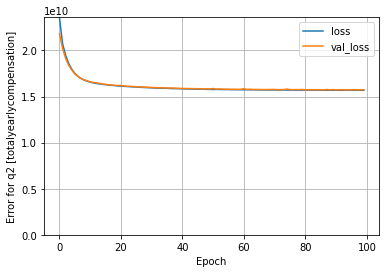

In [ ]:
plt.plot(hist_q2.history['loss'], label='loss')
plt.plot(hist_q2.history['val_loss'], label='val_loss')
plt.ylim([0, max(hist_q2.history['loss'])])
plt.xlabel('Epoch')
plt.ylabel('Error for q2 [totalyearlycompensation]')
plt.legend()
plt.grid(True)

In [ ]:
q2_linear_regression.evaluate(q2_xtest,q2_ytest)

949/949 [==============================] - 2s 2ms/step - loss: 24161454080.0000


24161454080.0

In [ ]:
q2_predict = q2_linear_regression.predict(q2_xtest).flatten()
def rmse(y_predict, y_test):
    return np.sqrt(np.square(np.subtract(y_test,y_predict)).mean())
rmse(q2_predict,q2_ytest)

155439.49938143784

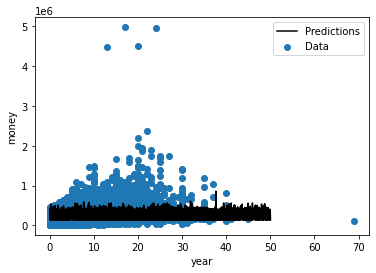

In [ ]:
x = tf.linspace(0.0, 50, q2_predict.shape[0])

plt.scatter(q2_xtrain['yearsofexperience'], q2_ytrain, label='Data')
plt.plot(x, q2_predict, color='k', label='Predictions')
plt.xlabel('year')
plt.ylabel('money')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


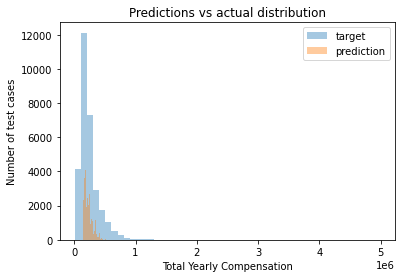

In [ ]:
sns.distplot(q2_ytest, label='target', kde=False)
sns.distplot(q2_predict, label='prediction', kde=False)

plt.legend()

plt.ylabel('Number of test cases')
plt.xlabel('Total Yearly Compensation')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
in_yearEx = input("Please enter how many years of experience you have:")
in_yearEx = float(in_yearEx)
in_prediction =[[in_yearEx,1,1,1]]
ans_q2 = q2_linear_regression.predict(in_prediction)
print( "If you accpect an offer for a " + in_position + " from " + in_company + " based on "+ str(in_yearEx) + " and in " + in_location + ", you will get: " + str(ans_q2[0][0]))


Please enter how many years of experience you have:1
If you accpect an offer for a Software Engineer from google based on 1.0 and in Cupertino, CA, you will get: 187687.66


In [ ]:
in_stay = input("how long will you going to stay:")
in_stay = float(in_stay)
in_prediction =[[in_yearEx+in_stay,1,1,1]]
q2_linear_regression.predict(in_prediction)

print( "You will be getting " + str(ans_q2[0][0]) + " for a " + in_position + " after " + str(in_stay) + " years joining to " + in_company  )


how long will you going to stay:10
You will be getting 187687.66 for a Software Engineer after 10.0 years joining to google
